In [27]:
from pylab import*

In [ ]:
def RK_4(edo,x_ini,t):
    sol = zeros( (len(t) , len(x_ini)) )
    sol[0,:] = x_ini
    delta = t[1]-t[0]
    for i in range(0,len(t)-1):
        k1 = edo(sol[i,:],t[i])
        k2 = edo(sol[i,:] + 0.5*delta*k1 , t[i] + 0.5*delta)
        k3 = edo(sol[i,:] + 0.5*delta*k2 , t[i] + 0.5*delta)
        k4 = edo(sol[i,:] + delta*k2 , t[i] + delta)
        sol[i+1,:] = sol[i,:] + (delta/6.0)*(k1 + 2.0*k2 + 2.0*k3 + k4)
    return sol

In [ ]:
def pendulo_ff(t_vt,t,param=[1,0.1,0.1,0.1]):
    # t_vt = [ theta , v_theta ]
    # param = [ omega 0 , gamma , A , omega 1]
    omega0,gamma,A,omega1 = param
    dth = t_vt[1]
    dv_th = -omega0*sin(t_vt[0]) - gamma*t_vt[1] + A*cos(omega1*t)
    return array([dth,dv_th])

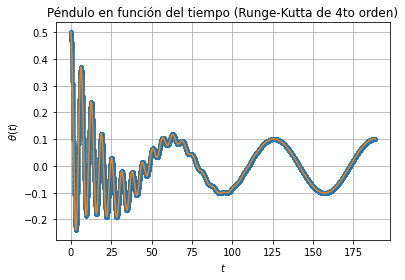

In [38]:
title("Péndulo en función del tiempo (Runge-Kutta de 4to orden)"),xlabel(r"$t$"),ylabel(r"$\theta(t)$")
tiempo = arange(0,60*pi,0.01)
sol_num_rk4zz = rk4zz(pendulo_ff,[0.5,0.0],tiempo)
so_num_rk4 = RK_4(pendulo_ff,[0.5,0.0],tiempo)
plot(tiempo,sol_num_rk4zz[:,0],'.')
plot(tiempo,so_num_rk4[:,0])
grid()
show()

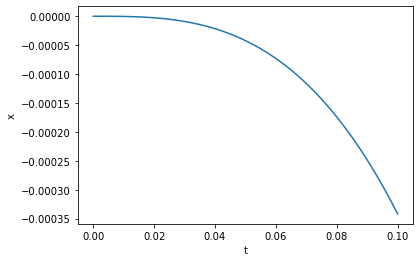

In [45]:
def rk4zz(f, x0, t):
    x = zeros((len(t), len(x0)))
    x[0] = x0
    h = t[1] - t[0]
    for i in range(0,len(t)-1):
        k1 = f(x[i], t[i])
        k2 = f(x[i] + h/2*k1, t[i] + h/2)
        k3 = f(x[i] + h/2*k2, t[i] + h/2)
        k4 = f(x[i] + h*k3, t[i+1])
        x[i+1] = x[i] + h/6*(k1 + 2*k2 + 2*k3 + k4)
    return x

# Example usage
def f(x, t):
    return x-t**2

x0 = array([0.0])
t = linspace(0.0, 0.1 )

x = rk4zz(f, x0, t)

plot(t, x)
xlabel('t')
ylabel('x')
show()

In [48]:
t1 = 0.1
idx = np.searchsorted(t, t1)
x = rk4zz(f, x0, t[:idx+1])[-1]

print(f"The solution at t={t1} is x={x}")

The solution at t=0.1 is x=[-0.00034184]


In [53]:
from numpy import zeros, linspace

def rk4zz(f, x0, t1, n=10000):
    t = linspace(0.0, t1, n+1)
    x = zeros((len(t), len(x0)))
    x[0] = x0
    h = t[1] - t[0]
    for i in range(0,len(t)-1):
        k1 = f(x[i], t[i])
        k2 = f(x[i] + h/2*k1, t[i] + h/2)
        k3 = f(x[i] + h/2*k2, t[i] + h/2)
        k4 = f(x[i] + h*k3, t[i+1])
        x[i+1] = x[i] + h/6*(k1 + 2*k2 + 2*k3 + k4)
    return x[-1]

# Example usage
def f(x, t):
    return x-t**2

x0 = [1.0]
t1 = 0.0

x = rk4zz(f, x0, t1)

print(f"The solution at t={t1} is x={x}")

The solution at t=0.0 is x=[1.]


In [54]:
from numpy import zeros, linspace, sin, exp
import matplotlib.pyplot as plt

def rk4zz(f, x0, t):
    n = len(t) - 1
    x = zeros((n+1, len(x0)))
    x[0] = x0
    for i in range(n):
        h = t[i+1] - t[i]
        k1 = f(x[i], t[i])
        k2 = f(x[i] + h/2*k1, t[i] + h/2)
        k3 = f(x[i] + h/2*k2, t[i] + h/2)
        k4 = f(x[i] + h*k3, t[i+1])
        x[i+1] = x[i] + h/6*(k1 + 2*k2 + 2*k3 + k4)
    return x

# Example usage
def f(x, t):
    dxdt = x[1]
    dydt = exp(-t)*sin(3*t) - 0.5*x[1] - sin(x[0])
    return [dxdt, dydt]

x0 = [0.0, 1.0]
t = linspace(0.0, 10.0, 101)

x = rk4zz(f, x0, t)

plt.plot(t, x[:,0], label='x')
plt.plot(t, x[:,1], label='x\'')
plt.xlabel('t')
plt.legend()
plt.show()

TypeError: can't multiply sequence by non-int of type 'numpy.float64'

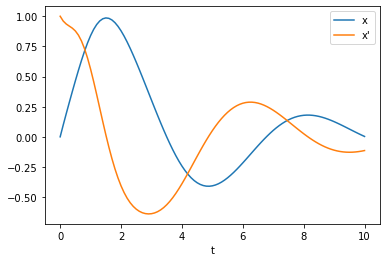

In [55]:
from numpy import zeros, linspace, sin, exp, array
import matplotlib.pyplot as plt

def rk4zz(f, x0, t):
    n = len(t) - 1
    x = zeros((n+1, len(x0)))
    x[0] = x0
    for i in range(n):
        h = t[i+1] - t[i]
        k1 = f(x[i], t[i])
        k2 = f(x[i] + h/2*k1, t[i] + h/2)
        k3 = f(x[i] + h/2*k2, t[i] + h/2)
        k4 = f(x[i] + h*k3, t[i+1])
        x[i+1] = x[i] + h/6*(k1 + 2*k2 + 2*k3 + k4)
    return x

# Example usage
def f(x, t):
    dxdt = x[1]
    dydt = exp(-t)*sin(3*t) - 0.5*x[1] - sin(x[0])
    return array([dxdt, dydt])

x0 = [0.0, 1.0]
t = linspace(0.0, 10.0, 101)

x = rk4zz(f, x0, t)

plt.plot(t, x[:,0], label='x')
plt.plot(t, x[:,1], label='x\'')
plt.xlabel('t')
plt.legend()
plt.show()

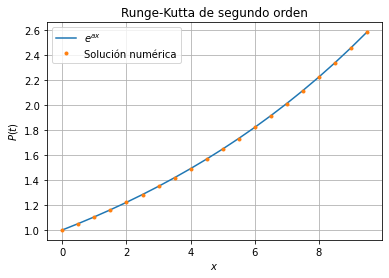

In [57]:
def modelo_exp(P,t,a=0.1):
    return a*P

tiempo = arange(0,10,0.5)
sol_num = rk4zz(modelo_exp,[1],tiempo)
title("Runge-Kutta de segundo orden"),xlabel("$x$"),ylabel("$P(t)$")
plot(tiempo,exp(0.1*tiempo),label="$e^{ax}$")
plot(tiempo,sol_num,'.',label="Solución numérica")
grid(), legend()
show()

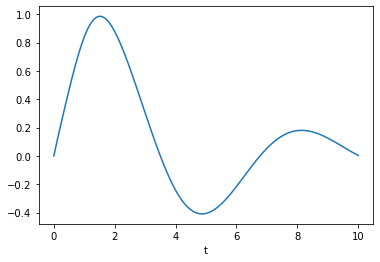

In [58]:
from numpy import zeros, linspace, sin, exp, array
import matplotlib.pyplot as plt

def rk4zz(f, x0, t):
    n = len(t) - 1
    x = zeros((n+1, len(x0)))
    x[0] = x0
    for i in range(n):
        h = t[i+1] - t[i]
        k1 = f(x[i], t[i])
        k2 = f(x[i] + h/2*k1, t[i] + h/2)
        k3 = f(x[i] + h/2*k2, t[i] + h/2)
        k4 = f(x[i] + h*k3, t[i+1])
        x[i+1] = x[i] + h/6*(k1 + 2*k2 + 2*k3 + k4)
    return x[:,0]

# Example usage
def f(x, t):
    dxdt = x[1]
    dydt = exp(-t)*sin(3*t) - 0.5*x[1] - sin(x[0])
    return array([dxdt, dydt])

x0 = [0.0, 1.0]
t = linspace(0.0, 10.0, 101)

x = rk4zz(f, x0, t)

plt.plot(t, x)
plt.xlabel('t')
plt.show()